In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
import os
os.chdir("../../scVI/")
os.getcwd()
save_path = '../CSF/Notebooks/'

In [4]:
import pickle
import pandas as pd
from copy import deepcopy

In [5]:
save_path = '../CSF/Notebooks/'
with open(save_path + 'dataset/all_datasets.pkl', 'rb') as f:
    gene_dataset = pickle.load(f)


In [6]:
latent_u = np.load(save_path + 'UMAP/all_dataset.umap.npy')
celllabels = np.load(save_path + 'meta/celllabels.npy')
celltype, labels = np.unique(celllabels, return_inverse=True)
isMS = np.load(save_path+'meta/isMS.npy')
isCSF = np.load(save_path+'meta/isCSF.npy')
validclusters = (celllabels!='Mono Doublet') & \
(celllabels!='contamination1') & \
(celllabels!='doublet') & \
(celllabels!='B cell doublets') & \
(celllabels!='RBC')
isCD4 = (celllabels=='CD4')

In [7]:
batchid = np.load(save_path + 'meta/batchid.npy')

In [8]:
latent_u = latent_u[celllabels=='CD4',:]
isMS = isMS[celllabels=='CD4']
isCSF = isCSF[celllabels=='CD4']

In [9]:
celllabels = np.load(save_path + 'meta/CD4.clusters.npy')

In [10]:
cd4, cd4occ = np.unique(celllabels,return_counts=True)

In [11]:
cd4occ[cd4==8]/np.sum(cd4occ)

array([0.07540331])

In [12]:
len(np.unique(celllabels))

12

In [13]:
VisionScore = pd.read_csv('../CSF/signatures/sigScore.csv')

In [14]:
colors = ['#a30000', '#ff6666', '#ff9d00', '#c3ff00', '#3a470e', '#34a321', '#2198a3', '#001547', '#3400a3', '#9666ff', '#470e28', '#a3416d']
mean_pos = []
for i,x in enumerate(np.unique(celllabels)):
    idx = (celllabels==x)
    mean_pos.append([np.median(latent_u[idx,0]),np.median(latent_u[idx,1])])



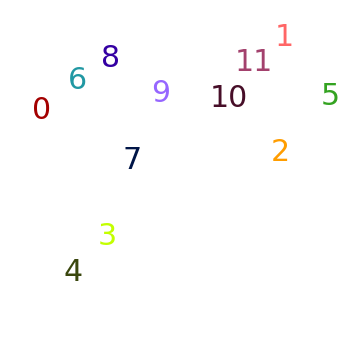

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))

for i,x in enumerate(np.unique(celllabels)):
    if (x != 'contamination1') and (x!='doublet') and (x!='Mono Doublet') and (x!='B cell doublets') and (x!='RBC'):
        idx = (celllabels==x)
        ax.scatter(latent_u[idx, 0][0], latent_u[idx, 1][0],label=x,edgecolors='none',c=colors[i],s=5,alpha=0)
        ax.text(mean_pos[i][0]+1, mean_pos[i][1], x, fontsize=30,color=colors[i])
        
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path+'figures/Figure3/CD4.labels.pdf')


# show TFH cell origins

In [16]:
np.quantile(VisionScore['TFH'],0.95)

0.06130628984704253

In [17]:
TFH = np.asarray(VisionScore['TFH']>0.06)

In [18]:
len(isCSF)

25105

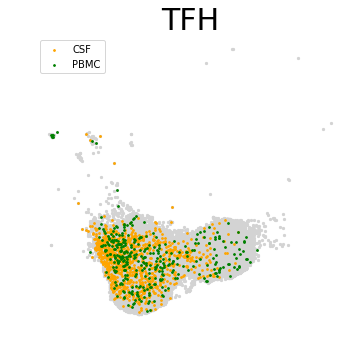

In [19]:
fig, ax = plt.subplots(figsize=(5, 5),facecolor='white')
plt.scatter(latent_u[:, 0], latent_u[:, 1],c='lightgray',s=5)
plt.scatter(latent_u[:, 0][TFH & isCSF], latent_u[:, 1][TFH & isCSF],c='orange',s=3,label='CSF')
plt.scatter(latent_u[:, 0][TFH & (isCSF==False)], latent_u[:, 1][TFH & (isCSF==False)],c='green',s=3,label='PBMC')
plt.title('TFH',fontsize=30)
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.savefig(save_path+'figures/SupFigure8/TFH.CSF_PBMC.pdf')

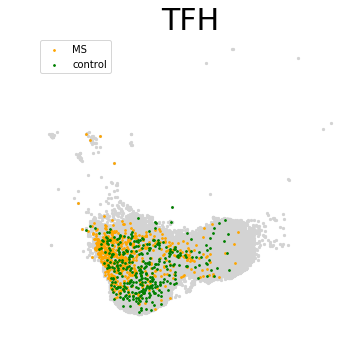

In [20]:
fig, ax = plt.subplots(figsize=(5, 5),facecolor='white')
plt.scatter(latent_u[:, 0], latent_u[:, 1],c='lightgray',s=5)
plt.scatter(latent_u[:, 0][TFH & isCSF & isMS], latent_u[:, 1][TFH & isCSF & isMS],c='orange',s=3,label='MS')
plt.scatter(latent_u[:, 0][TFH & isCSF & (isMS==False)], latent_u[:, 1][TFH & isCSF & (isMS==False)],c='green',s=3,label='control')
plt.title('TFH',fontsize=30)
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.savefig(save_path+'figures/SupFigure8/TFH.MSinCSF.pdf')

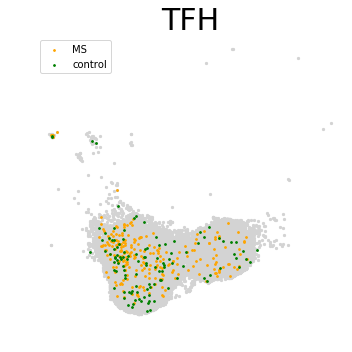

In [21]:
fig, ax = plt.subplots(figsize=(5, 5),facecolor='white')
plt.scatter(latent_u[:, 0], latent_u[:, 1],c='lightgray',s=5)
plt.scatter(latent_u[:, 0][TFH & (isCSF==False) & isMS], latent_u[:, 1][TFH & (isCSF==False) & isMS],c='orange',s=3,label='MS')
plt.scatter(latent_u[:, 0][TFH & (isCSF==False) & (isMS==False)], latent_u[:, 1][TFH & (isCSF==False) & (isMS==False)],c='green',s=3,label='control')
plt.title('TFH',fontsize=30)
plt.axis("off")
plt.legend()
plt.tight_layout()
plt.savefig(save_path+'figures/SupFigure8/TFH.MSinPBMC.pdf')

In [22]:
VisionScore.columns

Index(['Unnamed: 0', 'G1/S', 'G2/M', 'Temra', 'Th2', 'Th17', 'TFH', 'Tregs',
       'gdT', 'microglia', 'Patho-manual', 'CD4_memory_vs_Naive', 'TFH_core',
       'TFH_expanded', 'G1/S_Phase', 'G2/M_Phase', 'M_Phase', 'M/G1_Phase',
       'S_Phase', 'codeset', 'Alpha6-Beta4-Integrin_EXP',
       'Androgen-Receptor_EXP', 'B-Cell-Receptor_EXP', 'EGFR1_EXP',
       'Hedgehog_EXP', 'ID_EXP', 'IL-1_EXP', 'IL-2_EXP', 'IL-3_EXP',
       'IL-4_EXP', 'IL-5_EXP', 'IL-6_EXP', 'IL-7_EXP', 'IL-9_EXP',
       'Kit-Receptor_EXP', 'Notch_EXP', 'T-Cell-Receptor_EXP',
       'TGF-beta-Receptor_EXP', 'TNF-alpha_EXP', 'Wnt_EXP',
       'ITREG_vs_other_Thelper', 'NTREG_vs_other_Thelper',
       'Naive_vs_other_Thelper', 'TH17_vs_other_Thelper',
       'TH1_vs_other_Thelper', 'TH2_vs_other_Thelper',
       'STAT3 KO vs. WT (Th17)', 'STAT5 KO vs. WT (Th17)',
       'RORC KO vs. WT (Th17)', 'EGR2', 'ETV6', 'FAS', 'IKZF4',
       'IL23+TGFB+IL6 vs TGFB+IL6 (Th17)', 'IRF8', 'MINA', 'PLAC8', 'Th1',
       'Memory

In [23]:
sigs =  ['Temra','Th2','Th17','TFH','Tregs','G1/S_Phase', 'G2/M_Phase', 
         'M_Phase', 'M/G1_Phase','S_Phase','Th1','Memory', 'Patho-large', 
         'CD4_exausted_vs_Naive', 
         'TH17_vs_other_Thelper','TH1_vs_other_Thelper', 'TH2_vs_other_Thelper']

In [24]:
len(sigs)

17

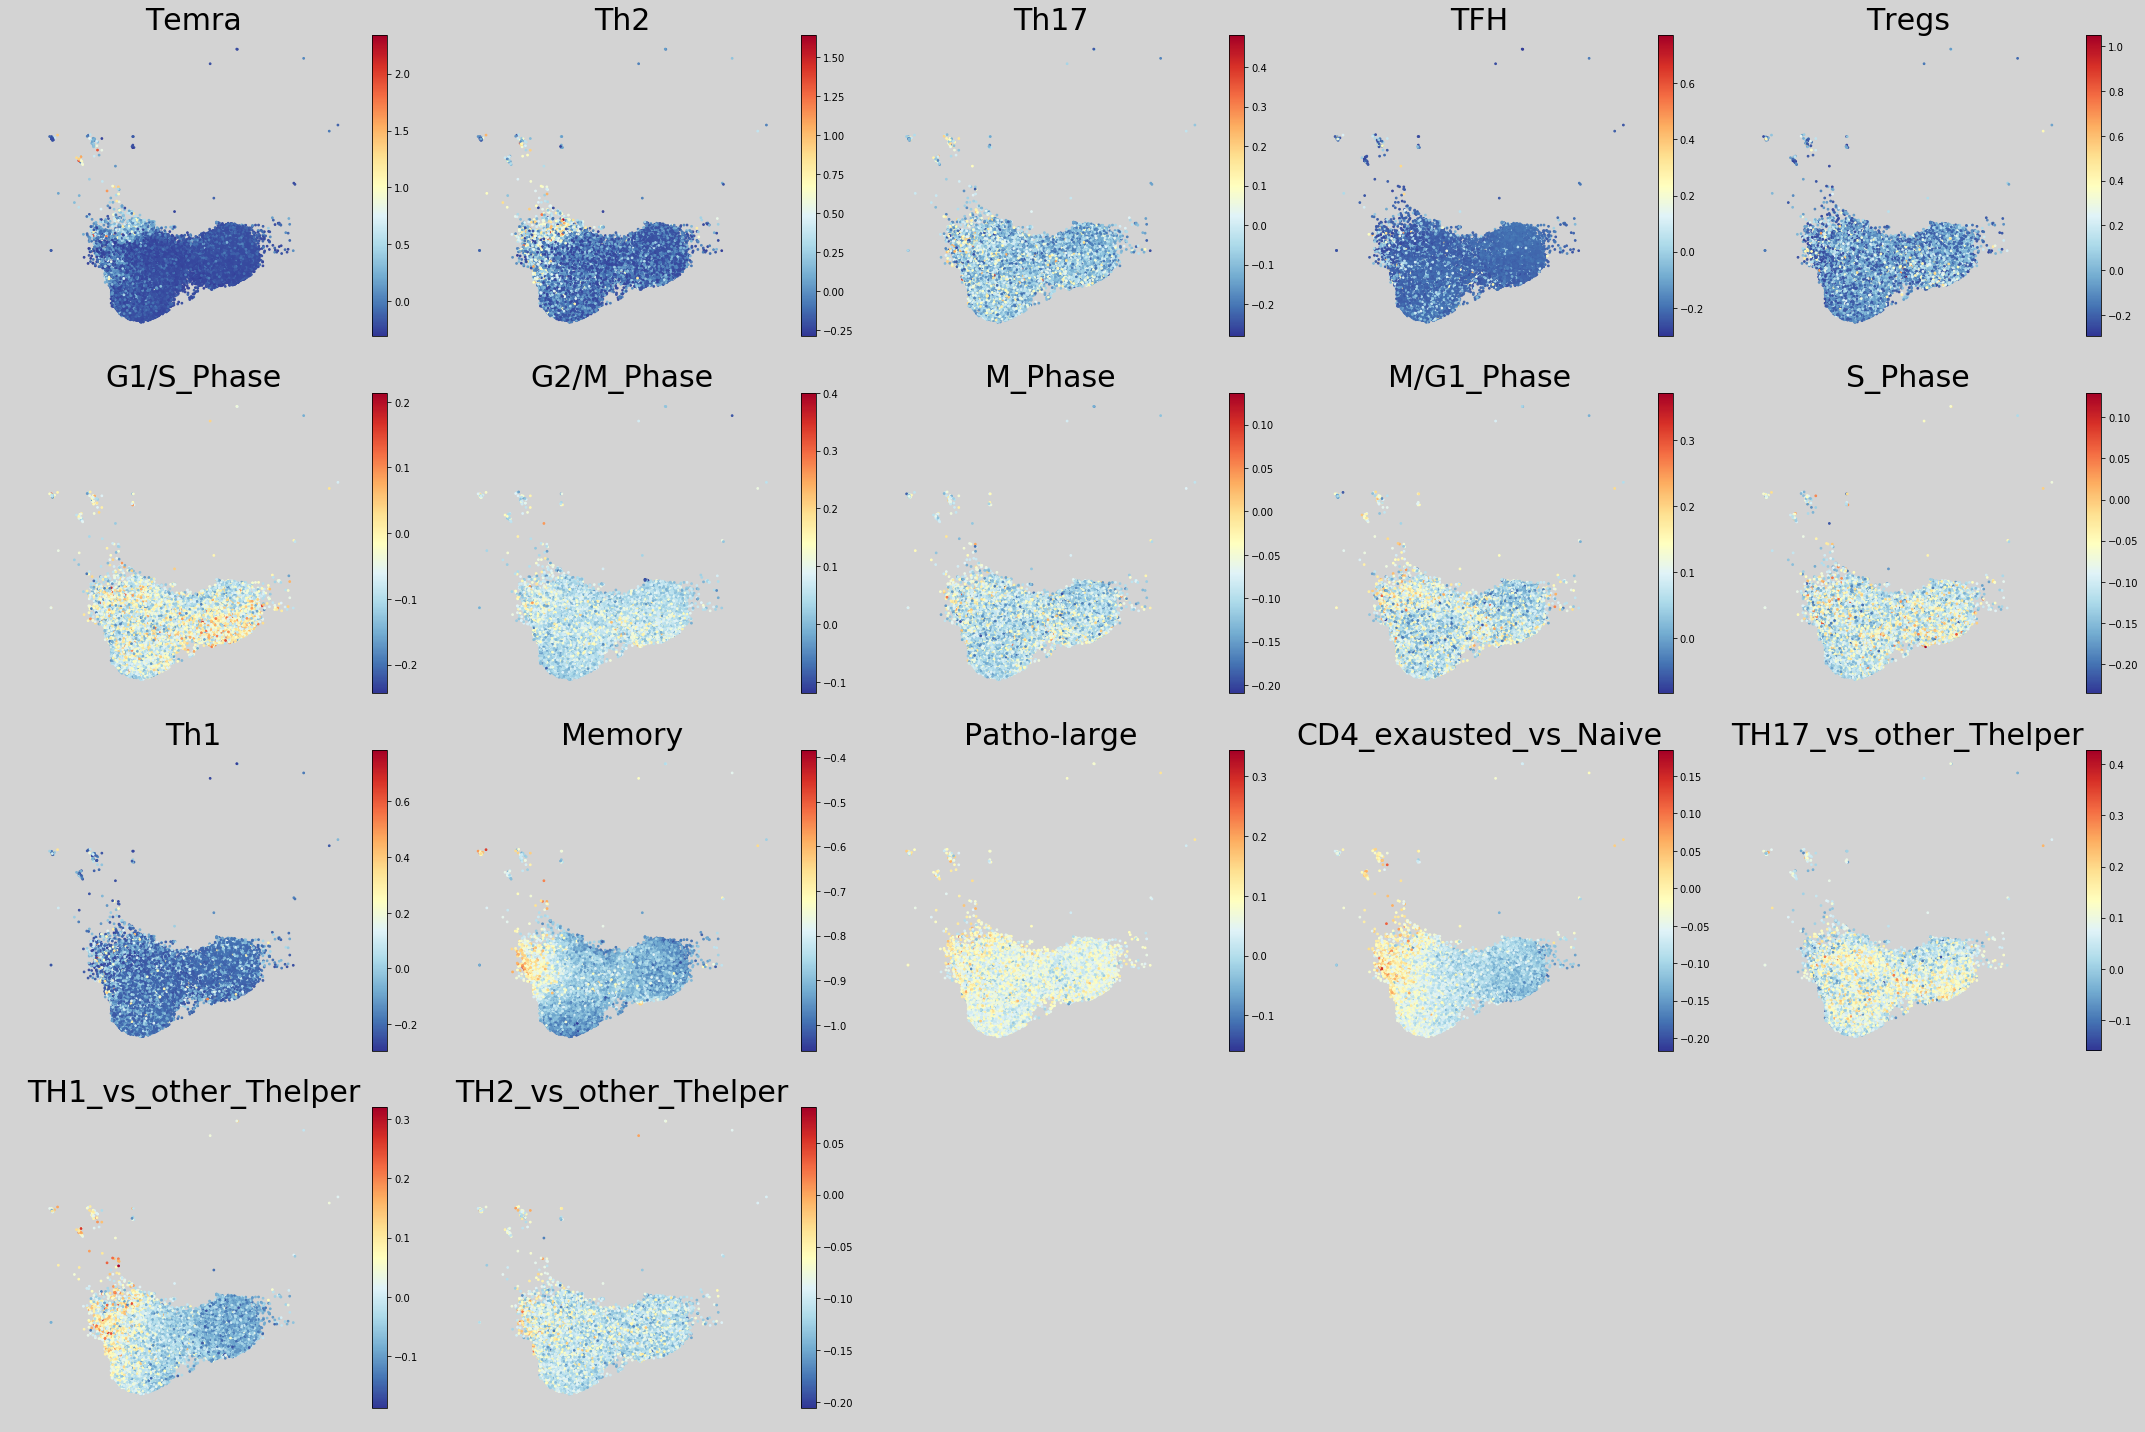

In [27]:
fig, ax = plt.subplots(figsize=(30, 20),facecolor='lightgray')
for i,x in enumerate(sigs):
    plt.subplot(4,5,i+1)
    plt.scatter(latent_u[:, 0], latent_u[:, 1],c=(np.asarray(VisionScore[x])),
                cmap='RdYlBu_r',s=3)
    plt.colorbar()
    plt.title(x,fontsize=30)
    plt.axis("off")
    plt.tight_layout()

plt.savefig(save_path+'figures/Figure3/signatures.all.pdf')


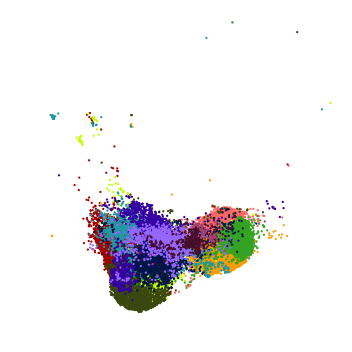

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))
for i,x in enumerate(np.unique(celllabels)):
    if (x != 'contamination1') and (x!='doublet') and (x!='Mono Doublet') and (x!='B cell doublets') and (x!='RBC'):
        idx = (celllabels==x)
        ax.scatter(latent_u[idx, 0], latent_u[idx, 1],label=x,edgecolors='none',c=colors[i],s=5)
        
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path+'figures/Figure3/CD4.all.pdf')


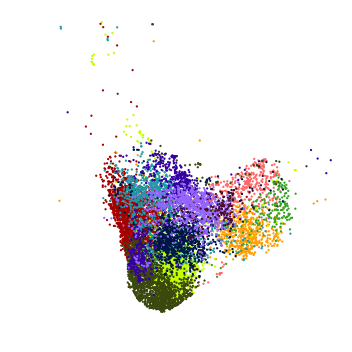

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))
for i,x in enumerate(np.unique(celllabels)):
    if (x != 'contamination1') and (x!='doublet') and (x!='Mono Doublet') and (x!='B cell doublets') and (x!='RBC'):
        idx = (celllabels==x)*isCSF
        ax.scatter(latent_u[idx, 0], latent_u[idx, 1],label=x,edgecolors='none',c=colors[i],s=5)
        
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path+'figures/Figure3/CD4.CSF.pdf')


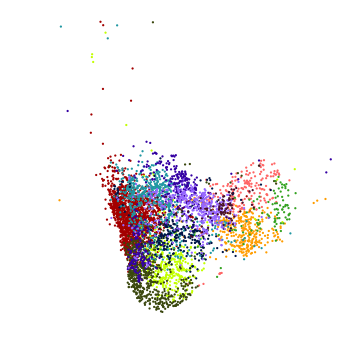

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
for i,x in enumerate(np.unique(celllabels)):
    if (x != 'contamination1') and (x!='doublet') and (x!='Mono Doublet') and (x!='B cell doublets') and (x!='RBC'):
        idx = (celllabels==x)*isCSF*isMS
        ax.scatter(latent_u[idx, 0], latent_u[idx, 1],label=x,edgecolors='none',c=colors[i],s=5)
        
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path+'figures/Figure3/CD4.MS_CSF.png',dpi=300)


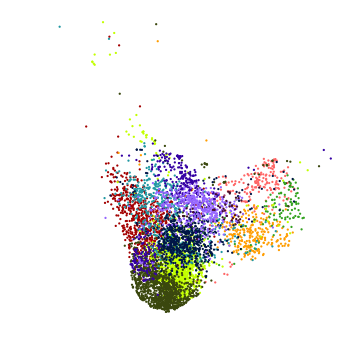

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
for i,x in enumerate(np.unique(celllabels)):
    if (x != 'contamination1') and (x!='doublet') and (x!='Mono Doublet') and (x!='B cell doublets') and (x!='RBC'):
        idx = (celllabels==x)*isCSF*(isMS==False)
        ax.scatter(latent_u[idx, 0], latent_u[idx, 1],label=x,edgecolors='none',c=colors[i],s=5)
        
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path+'figures/Figure3/CD4.control_CSF.png',dpi=300)


In [32]:
with open(save_path + 'dataset/all_datasets.pkl', 'rb') as f:
    gene_dataset = pickle.load(f)

# logX = np.log10(1+gene_dataset.X.todense())
# scaling_factor = logX.mean(axis=1)
# norm_X = logX - scaling_factor.reshape(len(scaling_factor), 1)

scaling_factor = gene_dataset.X.mean(axis=1)
norm_X = gene_dataset.X.todense()/scaling_factor.reshape(len(scaling_factor), 1)

labels = np.load(save_path + 'meta/CD4.clusters.npy')
celltypes = np.unique(labels).astype(str)

celllabels = np.load(save_path + 'meta/celllabels.npy')
isCD4 = celllabels=='CD4'
CD4labels = np.repeat(-1,len(celllabels))
CD4labels[isCD4] = labels
genenames = gene_dataset.gene_names

In [90]:
def Heatmap(norm_X, genenames, genelist, filt, clusterlabel, title,filename, celltype=None):
    if celltype is None:
        celltype = np.unique(clusterlabel)
    exprs = [norm_X[:,genenames==x] for x in genelist]
    exprs = np.asarray(exprs).squeeze()
    exprs = pd.DataFrame(exprs.T, columns=genelist)
#     exprs = exprs.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)), axis=0)
    if filt is None:
        filt = np.repeat(True,len(exprs))
    exprs = exprs.loc[filt]
    clusterlabel = clusterlabel[filt]
    mean_exprs = []
    for x in np.unique(clusterlabel):
        avg = exprs.loc[clusterlabel==x].mean(axis=0)
        mean_exprs.append(avg)
    mean_exprs = pd.concat(mean_exprs,axis=1)
    mean_exprs.columns = np.unique(clusterlabel)
    mean_exprs = mean_exprs
    mean_exprs = mean_exprs[celltype]
    rownames = list(mean_exprs.index)
    colnames = list(mean_exprs.columns)
    unorm = deepcopy(mean_exprs)
    mean_exprs = mean_exprs.apply(lambda x:(x-np.min(x))/(np.max(x)-np.min(x)), axis=1)
    fig, ax = plt.subplots(figsize=(9,8))
    # We want to show all ticks...
    im = ax.imshow(mean_exprs,aspect='auto')
    ax.set_yticks(np.arange(len(rownames)))
    ax.set_xticks(np.arange(len(colnames)))
    # ... and label them with the respective list entries
    ax.set_yticklabels(rownames,fontsize=20)
    ax.set_xticklabels(colnames,fontsize=20)
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    ax.set_title(title,fontsize=40)
    fig.tight_layout()
    plt.savefig(filename, transparency=True)
    return mean_exprs

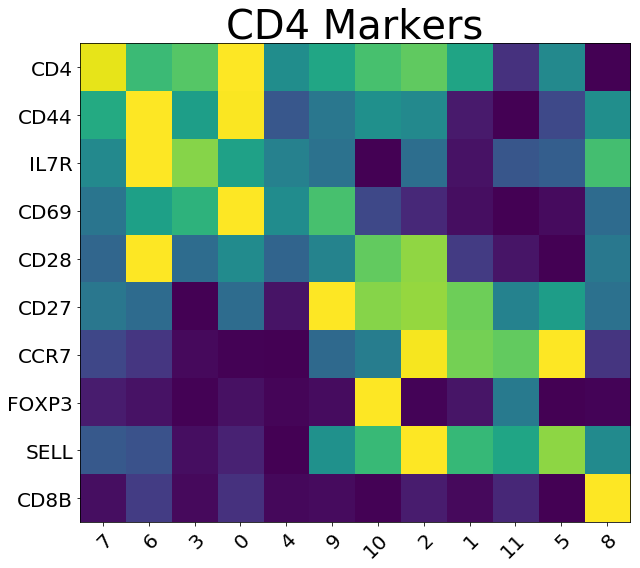

In [85]:
genelist = ['CD4', 'CD44','IL7R', 'CD69',  'CD28', 'CD27','CCR7', 'FOXP3', 'SELL', 'CD8B']
mean_exprs = Heatmap(norm_X, genenames, genelist, isCD4,CD4labels,
                     'CD4 Markers',save_path+'figures/Figure3/CD4markers.pdf',
                     celltype=[7,6,3,0,4,9,10,2,1,11,5,8])

In [86]:
print([x for x in genelist if x in genenames])

['CD4', 'CD44', 'IL7R', 'CD69', 'CD28', 'CD27', 'CCR7', 'FOXP3', 'SELL', 'CD8B']


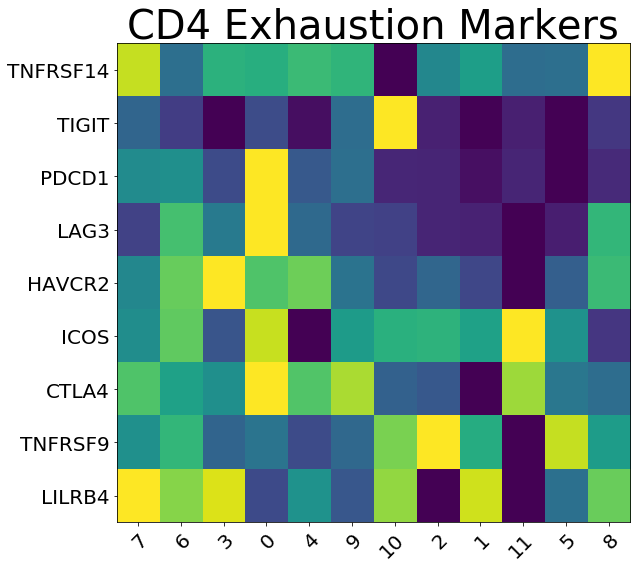

In [87]:
genelist = ['TNFRSF14','TIGIT','PDCD1','LAG3','HAVCR2','ICOS','CTLA4','TNFRSF9','LILRB4']
mean_exprs = Heatmap(norm_X, genenames, genelist, isCD4,CD4labels,
                     'CD4 Exhaustion Markers',save_path+'figures/Figure3/CD4exhaust.pdf',
                     celltype=[7,6,3,0,4,9,10,2,1,11,5,8])

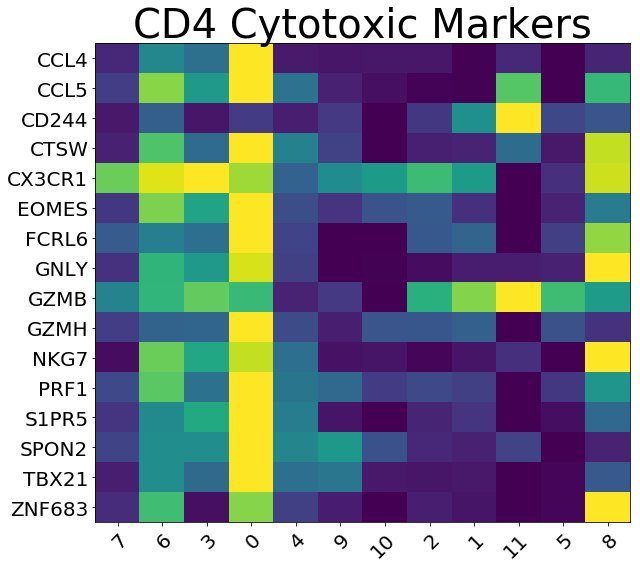

In [91]:
genelist = ['CCL4', 'CCL5', 'CD244', 'CTSW', 'CX3CR1', 'EOMES', 'FCRL6', 'GNLY', 'GZMB', 'GZMH', 'NKG7', 'PRF1', 'S1PR5', 'SPON2', 'TBX21', 'ZNF683']
mean_exprs = Heatmap(norm_X, genenames, genelist, isCD4,CD4labels,
                     'CD4 Cytotoxic Markers',save_path+'figures/Figure3/CD4cytoxic.pdf',
                     celltype=[7,6,3,0,4,9,10,2,1,11,5,8])

In [93]:
genelist=['GZMA','GZMK',
          'FCGRT','APBB1',
          'BCL11B','GABPB1-AS1',
          'IL7R','KLRB1',
          'S100A11','IFT20',
          'MT-ND4','MT-CO3',
          'PRDM1', 'CAST',
          'CD84','RCBTB2',
         'HLA-DRB1', 'IL2RG',
         'HDAC1','IL6R',
         'TIGIT','IRF2BP2',
         'RAB8A','STOM']

In [ ]:
mean_exprs,mean_nz = DotPlot(norm_X, gene_dataset.gene_names, 
            genelist, celllabels, 
            labelnames=['plasma','B1','B2','CD4','Tregs','Tdg','CD8n','CD8a','NK1','NK2','Mono','ncMono','Gran','mDC1','mDC2','pDC','MegaK'],
            filt=validclusters, dotsize=1,filename=save_path+'figures/Figure1/dotplot.pdf')


/data/yosef2/users/chenling/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


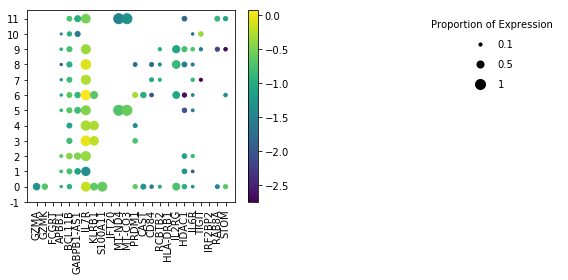

In [109]:
mean_exprs,mean_nz = DotPlot(norm_X, gene_dataset.gene_names,
            list(genelist), CD4labels, 
#             labelnames = list(np.unique(CD4labels)),
            filt=isCD4,dotsize=1,filename=save_path+'figures/Figure3/CD4.dotplot.pdf')

In [110]:
print([x for x in gene_dataset.gene_names if x.startswith('IFN') or x.startswith('IRF') or x.startswith('IL')])

['IFNLR1', 'ILF2', 'IL6R', 'IL10', 'IRF2BP2', 'IL1R2', 'IL18R1', 'IL18RAP', 'IL1B', 'IL1RN', 'ILKAP', 'IL2', 'IL15', 'IRF2', 'IL7R', 'IL6ST', 'IRF1', 'IRF4', 'IFNGR1', 'IRF5', 'IL3RA', 'IL2RG', 'IL13RA1', 'IL7', 'IL11RA', 'IRF7', 'ILK', 'IL18', 'IL10RA', 'IL15RA', 'IL2RA', 'IL23A', 'IFNG-AS1', 'IFNG', 'IRF9', 'IRF2BPL', 'IL16', 'IL32', 'IL4R', 'IL21R', 'IRF8', 'ILF3-AS1', 'ILF3', 'IL27RA', 'ILVBL', 'IL12RB1', 'IFNL1', 'IRF3', 'IL4I1', 'IL17RA', 'IL2RB', 'IFNAR2', 'IL10RB-AS1', 'IL10RB', 'IFNAR1', 'IFNGR2']
